# **Computer Vision Semester Project**
# **Moving Object Detection Using OpenCV**
# *Project Performers:*
# **Muhammad Hamza CS_06**
# **Muhammad Awais Saeed CS_14**
# **Muhammad Huzaifa SHah CS_21**

# *Importing required Libraries*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# *Convert BGR to RGB to ensure colors are properly passed for displaying images using matplotlib*

In [3]:
def colorConvert(image):
  return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# *Extract Background in Video Input*

### Capturing the Video in 'cap' and extract 30 random frames and store the selected frames in an array

In [4]:
cap = cv2.VideoCapture('/content/drive/MyDrive/MovingObjectDetection(CV_Project)/CV_Project(input(2)).mp4')

#Randomly selecting 30 frames
frame_get = cap.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size = 30)

#Storing captured frames in an array
frames = []
for i in frame_get:
  cap.set(cv2.CAP_PROP_POS_FRAMES, i)
  ret, frame = cap.read()
  frames.append(frame)

cap.release()

### Calculating median and average frames, for better outlier removal 

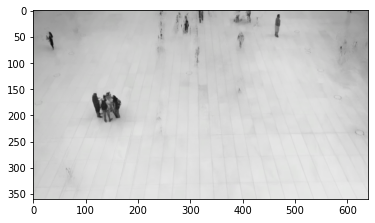

In [5]:
frame_median = np.median(frames, axis = 0).astype(dtype = np.uint8)
plt.imshow(colorConvert(frame_median))

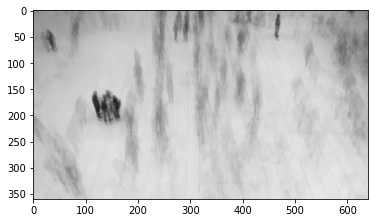

In [6]:
frame_avg = np.average(frames, axis = 0).astype(dtype = np.uint8)
plt.imshow(colorConvert(frame_avg))

# *Processing a Frame*

### Studying a single frame separately (first frame)

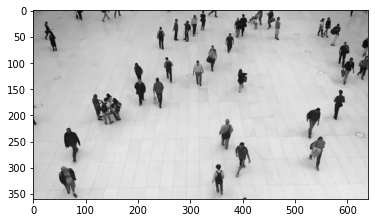

In [7]:
frame_sample = frames[0]
plt.imshow(colorConvert(frame_sample))

#*Converting the Median and sample image to grayscale*

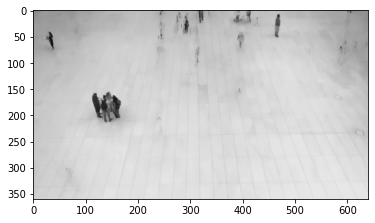

In [8]:
gray_frame_median = cv2.cvtColor(frame_median, cv2.COLOR_BGR2GRAY)
plt.imshow(colorConvert(gray_frame_median))

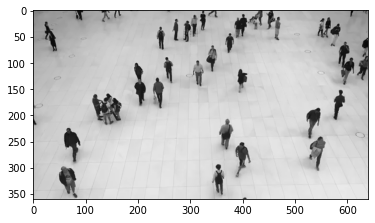

In [9]:
gray_frame_sample = cv2.cvtColor(frame_sample, cv2.COLOR_BGR2GRAY)
plt.imshow(colorConvert(gray_frame_sample))

# *Background Removal*

### Performing ***Absolute Difference*** between **gray_frame_sample** and **gray_frame_median** to get the moving objects only, with the background removed

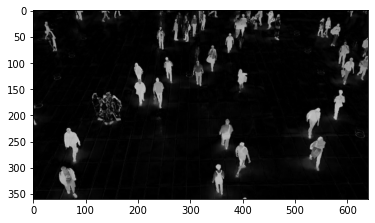

In [10]:
bg_removed_frame = cv2.absdiff(gray_frame_sample, gray_frame_median)
plt.imshow(colorConvert(bg_removed_frame))

Frame after background removal (ghost image)

#*Blurring*

### Performing ***Gaussian Blur*** for noise reduction and to simplify edge detection

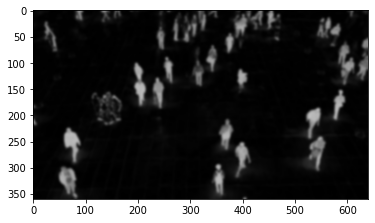

In [11]:
frame_blur = cv2.GaussianBlur(bg_removed_frame, (11,11), 0)
plt.imshow(colorConvert(frame_blur))

Frame after performing Gaussian Blur

#*Binarizing the image - Thresholding*

### Performing ***Threshold*** and ***OTSU Threshold*** to bring the moving objects out clearly

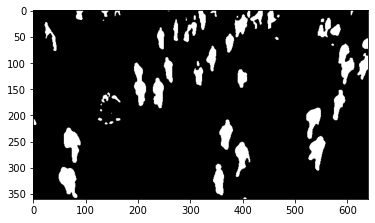

In [12]:
ret, frame_threshold = cv2.threshold(frame_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(colorConvert(frame_threshold))

Frame after thresholding

#*Countour and Boundary Boxes*

### Creating contours on the thresholded frame. Contours are ***curves joining continuous points in an image with same color intensity***. We shall use **cv2.RETR_EXTERNAL** to fing the extreme outer contours and **cv2.CHAIN_APPROX_SIMPLE** to remove the redundant points.

In [13]:
(contours, _ ) = cv2.findContours(frame_threshold.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

### Creating Bounding Boxes (rectangular) for identified contours and  display them on frame_sample

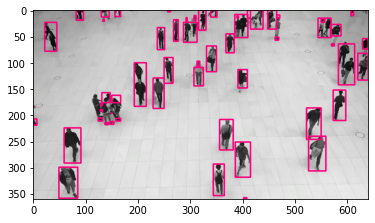

In [14]:
for i in contours:
  x, y, width, height = cv2.boundingRect(i)
  cv2.rectangle(frame_sample, (x,y), (x + width, y + height), (123,0,255), 2)
plt.imshow(colorConvert(frame_sample))

#*Compiling frames together for processing video*

### Declaring output video to be created

In [15]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video_writer = cv2.VideoWriter('/content/drive/MyDrive/MovingObjectDetection(CV_Project)/CV_Project (output(2)).mp4', fourcc, 20.0, (640, 480))

### Creating cap and getting total frame count

In [16]:
cap = cv2.VideoCapture('/content/drive/MyDrive/MovingObjectDetection(CV_Project)/CV_Project(input(2)).mp4')

#Randomly selecting 30 frames
frame_tot = cap.get(cv2.CAP_PROP_FRAME_COUNT)
frame_tot

341.0

We have a total of 795 frames

### Running a Loop to go through all frames and process the Video

In [17]:
frame_count = 0
font = cv2.FONT_HERSHEY_SIMPLEX

while (frame_count < frame_tot - 1):
  frame_count+=1
  ret, frame = cap.read()
  # Converting frame to grayscale
  gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  # Calculating Absolute Difference between Current Frame and Median Frame
  dframe = cv2.absdiff(gray_frame, gray_frame_median)
  # Applying Gaussian Blur to reduce noise
  blur_frame = cv2.GaussianBlur(dframe, (11,11), 0)
  # Binarizing frame - Thresholding
  ret, threshold_frame = cv2.threshold(blur_frame, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  # Identifying Contours
  (contours, _ ) = cv2.findContours(threshold_frame.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  # Drawing Boundary Boxes for each Contour
  for i in contours:
    x, y, width, height = cv2.boundingRect(i)
    cv2.rectangle(frame, (x,y), (x + width, y + height), (123,0,255), 2)
  
  cv2.putText(frame, "Objects detected: " + str(len(contours)), (55, 15), font, 0.6, (0, 180, 0), 2)
  video_writer.write(cv2.resize(frame, (640,480)))

# Releasing Video Object
cap.release()
video_writer.release()